In [12]:
import importlib

import mysklearn.myutils
importlib.reload(mysklearn.myutils)
import mysklearn.myutils as myutils

import plot_utils
importlib.reload(plot_utils)
import plot_utils as plot_utils

import mysklearn.mypytable
importlib.reload(mysklearn.mypytable)
from mysklearn.mypytable import MyPyTable 

import mysklearn.myclassifiers
importlib.reload(mysklearn.myclassifiers)
from mysklearn.myclassifiers import MyKNeighborsClassifier, MyDummyClassifier, MyNaiveBayesClassifier, MyDecisionTreeClassifier, MyRandomForestClassifier

import mysklearn.myevaluation
importlib.reload(mysklearn.myevaluation)
import mysklearn.myevaluation as myevaluation

In [2]:
ski_dataset = MyPyTable().load_from_file("./input_data/ski-resorts.csv")

# exploring different attribute combinations
ski_X = ski_dataset.get_columns(["elevation_top_m", "number_of_slopes", "annual_snowfall_cm"])
ski_y = ski_dataset.get_column("rating")

matrix_headers = ["rating", "very high", "high", "above average", "average", "below average", "low", "very low", "Total", "Recognition (%)"]

discretizer = myutils.discretize_ranking

## kNN classification of ski dataset

In [ ]:
# TODO: modify categorical method in kNN to be a given list
knn_clf = MyKNeighborsClassifier()

knn_actual, knn_pred, knn_accuracy, knn_error = myevaluation.cross_val_predict\
    (ski_X, ski_y, knn_clf, discretizer=discretizer, n_splits=10, shuffle=True, stratify=True)

myutils.randomize_in_place(knn_actual, knn_pred)
print(knn_actual[:20])
print(knn_pred[:20])

print(f"Accuracy: {knn_accuracy}, Error Rate: {knn_error}")
print()

matrix = myevaluation.confusion_matrix(knn_actual, knn_pred, matrix_headers[1:8])
print(myevaluation.tabulate_confusion_matrix(matrix, headers=matrix_headers))

['average', 'high', 'average', 'above average', 'above average', 'low', 'very low', 'above average', 'high', 'average', 'very low', 'average', 'low', 'very high', 'very high', 'average', 'above average', 'average', 'average', 'above average']
['average', 'average', 'below average', 'below average', 'average', 'low', 'low', 'average', 'high', 'low', 'low', 'below average', 'very low', 'above average', 'above average', 'low', 'average', 'average', 'below average', 'low']
Accuracy: 0.30785627283800243, Error Rate: 0.6921437271619976

rating           very high    high    above average    average    below average    low    very low    Total    Recognition (%)
-------------  -----------  ------  ---------------  ---------  ---------------  -----  ----------  -------  -----------------
very high               14      60               70         17                4      0           0      165                  8
high                    11      57              141         91               23   

In [ ]:
# TODO: ask Professor Sprint where part 4 of random forest should be implemented - in predict?
# TODO: ask Professor Sprint how we should handle our categorical decision tree issue - discretizer for X attributes?
forest_clf = MyRandomForestClassifier()

# discretize the output
y_disc = [discretizer(y) for y in ski_y]

# using N=5, M=3, F=2 as a "control"
X_test, y_test = forest_clf.fit(ski_X, y_disc, 5, 3, 2)
forest_pred = forest_clf.predict(X_test)

forest_accuracy = myevaluation.accuracy_score(y_test, forest_pred)
forest_error = 1 - forest_accuracy

forest_actual = y_test

print(f"Accuracy: {forest_accuracy}, Error Rate: {forest_error}")
print()

# matrix = myevaluation.confusion_matrix(forest_actual, forest_pred, matrix_headers[1:8])
# print(myevaluation.tabulate_confusion_matrix(matrix, headers=matrix_headers))

Accuracy: 0.39452054794520547, Error Rate: 0.6054794520547946



## Issues faced
In regards to random forest, we are facing two primary issues. First, predictions sometimes are not being made. This is a bug that will likely be ironed out as we solve the next issue.


Another issue is that continuous attributes are being treated as categorical, which leads to a decision trees with hundreds if not thousands of branches.


In [39]:
# This version tends very much towards average, but we have already addressed this by changing the distributions of the discretizer.
print("actual",y_test[:10])
print("predicted",forest_pred[:10])
print()

tree = forest_clf.forest[0]
# tree.print_decision_rules()

actual ['very high', 'very high', 'very high', 'very high', 'very high', 'very high', 'very high', 'very high', 'very high', 'very high']
predicted ['', '', '', '', 'very high', '', '', 'high', 'average', 'high']



Truncated output of tree.print_decision_rules()

IF att1 == 0.0 THEN class = high  
IF att1 == 1.0 THEN class = below average  
IF att1 == 2.0 THEN class = average  
IF att1 == 3.0 THEN class = average  
IF att1 == 4.0 THEN class = average  
IF att1 == 5.0 THEN class = average  
IF att1 == 6.0 THEN class = average  
IF att1 == 7.0 THEN class = above average  
IF att1 == 8.0 THEN class = average  
IF att1 == 9.0 THEN class = above average  
IF att1 == 10.0 THEN class = average

## Data Visualizations

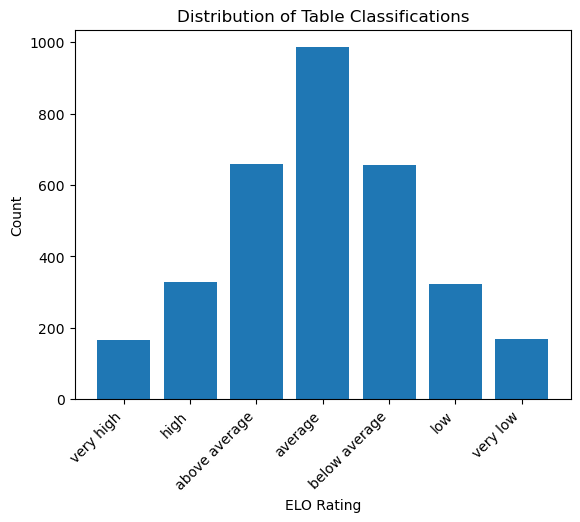

In [30]:
import matplotlib.pyplot as plt

# will make own method
y_disc = [discretizer(y) for y in ski_y]
values, counts = myutils.get_frequencies(y_disc)

order = [5, 3, 0, 1, 2, 4, 6]
ordered_values = [values[i] for i in order]
ordered_counts = [counts[i] for i in order]

plt.figure()
plt.bar(ordered_values, ordered_counts)
plt.xlabel("ELO Rating")
plt.ylabel("Count")
plt.title(f"Distribution of Table Classifications")
plt.xticks(rotation=45, ha="right")
plt.show()